## <div align="center">  Coursera IBM Data Science Capstone Project  </div> ##

#### <div align="center">  Which Parts of Los Angeles are The Most Suitable to Open a New Pet Store?? </div> ####
<div align="center"> Reza Ardian </div>

Hi! Welcome to my capstone project. The aim of this project is to answer the question: "Is there any particular part of Los Angeles City (not LA county) where it's the best to open a new pet store?". "Part" here means zip code or more or less reflects LA's neighborhood/ community. So, without further ado, let's start our journey to find it out!

#### 1. Data Acquisition and Preparation from Web ####

First thing first, let's get the data. The first data is the list of LA zip codes we're interested in, with their corresponding communities. The data can be found [here](http://www.laalmanac.com/communications/cm02a90001-90899.php) and [here](http://www.laalmanac.com/communications/cm02a91001-93599.php) in tabular form. Let's import them to one single panda dataframe.

In [1]:
#Let's import some necessary libraries

import pandas as pd
import requests
import numpy as np

Let's define a function to extract a table from laalmanac.com website. For some reason, it's not possible to extract it directly with pandas' read_html normal procedure. Then we extract all the necessary pages

In [2]:
def scrapping(url):
    header = {
      "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
      "X-Requested-With": "XMLHttpRequest"}
    
    r = requests.get(url, headers=header)
    df = pd.read_html(r.text)
    
    return df[0]

In [3]:
#create a list of two pages to extract

pages = ['http://www.laalmanac.com/communications/cm02a90001-90899.php','http://www.laalmanac.com/communications/cm02a91001-93599.php']

In [4]:
#since our zip code list is separated into 2 pages, let's concantenate them into one dataframe

#initialize list of dataframes
df_list = []

#iterate the list
for p in pages:
    df = scrapping(p)
    df_list.append(df)
   
#concantenate from list
dfc = pd.concat(df_list)
dfc

,Zip Code,Cities/Communities
0,90001,"Los Angeles (South Los Angeles), Florence-Graham"
1,90002,"Los Angeles (Southeast Los Angeles, Watts)"
2,90003,"Los Angeles (South Los Angeles, Southeast Los ..."
3,90004,"Los Angeles (Hancock Park, Rampart Village, Vi..."
4,90005,"Los Angeles (Hancock Park, Koreatown, Wilshire..."
...,...,...
253,93584,Lancaster (PO Boxes)
254,93586,"Lancaster, Quartz Hill (PO Boxes)"
255,93590,Palmdale (PO Boxes)
256,93591,"Lake Los Angeles, Palmdale"


So we have 516 rows now but the index is only until 257, lets reset the index column

In [5]:
dfc = dfc.reset_index()

In [6]:
dfc.drop('index', inplace=True, axis=1)
dfc

,Zip Code,Cities/Communities
0,90001,"Los Angeles (South Los Angeles), Florence-Graham"
1,90002,"Los Angeles (Southeast Los Angeles, Watts)"
2,90003,"Los Angeles (South Los Angeles, Southeast Los ..."
3,90004,"Los Angeles (Hancock Park, Rampart Village, Vi..."
4,90005,"Los Angeles (Hancock Park, Koreatown, Wilshire..."
...,...,...
511,93584,Lancaster (PO Boxes)
512,93586,"Lancaster, Quartz Hill (PO Boxes)"
513,93590,Palmdale (PO Boxes)
514,93591,"Lake Los Angeles, Palmdale"


Now, we need the coordinate data of each zip code. This csv file [here](https://public.opendatasoft.com/explore/dataset/us-zip-code-latitude-and-longitude/download/?format=csv&timezone=Asia/Shanghai&lang=fr&use_labels_for_header=true&csv_separator=%3B) has the geographical coordinate of all zip codes in the USA. So, we're going to fetch the coordinate of all our zip codes from that file.

In [7]:
df_coor = pd.read_csv("https://public.opendatasoft.com/explore/dataset/us-zip-code-latitude-and-longitude/download/?format=csv&timezone=Asia/Shanghai&lang=fr&use_labels_for_header=true&csv_separator=%3B", sep=';')
df_coor

,Zip,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
0,48834,Fenwick,MI,43.141649,-85.04948,-5,1,"43.141649,-85.04948"
1,55304,Andover,MN,45.254715,-93.28652,-6,1,"45.254715,-93.28652"
2,55422,Minneapolis,MN,45.014764,-93.33965,-6,1,"45.014764,-93.33965"
3,29079,Lydia,SC,34.296064,-80.11319,-5,1,"34.296064,-80.11319"
4,29390,Duncan,SC,34.888237,-81.96902,-5,1,"34.888237,-81.96902"
...,...,...,...,...,...,...,...,...
43186,50157,Malcom,IA,41.738800,-92.56155,-6,1,"41.7388,-92.56155"
43187,65212,Columbia,MO,38.937608,-92.33043,-6,1,"38.937608,-92.33043"
43188,11935,Cutchogue,NY,41.012868,-72.47230,-5,1,"41.012868,-72.4723"
43189,63539,Ethel,MO,39.893011,-92.74503,-6,1,"39.893011,-92.74503"


In [8]:
#rename columns
df_coor.rename(columns={"Zip": "Zip Code"}, inplace=True)

#change data type
dfc['Zip Code'] = dfc['Zip Code'].astype(str)
df_coor['Zip Code'] = df_coor['Zip Code'].astype(str)

#merge two dataframes with inner join merge
df = df_coor.merge(dfc, how='inner', on='Zip Code')
df

,Zip Code,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint,Cities/Communities
0,90265,Malibu,CA,34.051056,-118.807680,-8,1,"34.051056,-118.80768",Malibu
1,91372,Calabasas,CA,33.786594,-118.298662,-8,1,"33.786594,-118.298662",Los Angeles (Woodland Hills PO Boxes)
2,91396,Winnetka,CA,33.786594,-118.298662,-8,1,"33.786594,-118.298662",Los Angeles (Winnetka PO Boxes)
3,90293,Playa Del Rey,CA,33.957012,-118.441670,-8,1,"33.957012,-118.44167",Los Angeles (Playa del Rey)
4,91307,West Hills,CA,34.197737,-118.647970,-8,1,"34.197737,-118.64797","Los Angeles (West Hills), Bell Canyon"
...,...,...,...,...,...,...,...,...,...
505,91759,Mt Baldy,CA,34.231581,-117.661060,-8,1,"34.231581,-117.66106",Mount Baldy(Portion in LA County)
506,91225,Glendale,CA,33.786594,-118.298662,-8,1,"33.786594,-118.298662",Glendale (PO Boxes)
507,90080,Los Angeles,CA,33.786594,-118.298662,-8,1,"33.786594,-118.298662",Los Angeles (Los Angeles International Airport...
508,91612,North Hollywood,CA,33.786594,-118.298662,-8,1,"33.786594,-118.298662",Los Angeles (North Hollywood/US Purchasing Exc...


In [9]:
#Remove unnecessary columns

df = df[['Zip Code','Latitude','Longitude','Cities/Communities']]
df

,Zip Code,Latitude,Longitude,Cities/Communities
0,90265,34.051056,-118.807680,Malibu
1,91372,33.786594,-118.298662,Los Angeles (Woodland Hills PO Boxes)
2,91396,33.786594,-118.298662,Los Angeles (Winnetka PO Boxes)
3,90293,33.957012,-118.441670,Los Angeles (Playa del Rey)
4,91307,34.197737,-118.647970,"Los Angeles (West Hills), Bell Canyon"
...,...,...,...,...
505,91759,34.231581,-117.661060,Mount Baldy(Portion in LA County)
506,91225,33.786594,-118.298662,Glendale (PO Boxes)
507,90080,33.786594,-118.298662,Los Angeles (Los Angeles International Airport...
508,91612,33.786594,-118.298662,Los Angeles (North Hollywood/US Purchasing Exc...


Let's now populate our dataframe with other data, which are pet population in LA and rent price

In [11]:
#import pet data
df_pet = scrapping("http://www.laalmanac.com/environment/ev21z.php")

#rename the columns
df_pet.columns = ['Zip Code','Community','All House-holds','With Pets','With Dog','With Cat','With Bird','With Fresh Water Fish','With Salt Water Fish','With Reptile','With Small Animal']

#remove first row, because its the statistics for the entire LA county
df_pet = df_pet.iloc[1:]

#show our dataset, we're interested in with pets, with dogs, and with cats column
df_pet = df_pet[['Zip Code','With Pets']]

df_pet

,Zip Code,With Pets
1,90001,7221
2,90002,6639
3,90003,8672
4,90004,11579
5,90005,8577
...,...,...
278,93551,8498
279,93552,5307
280,93553,412
281,93563,67


Now, from rent data

In [12]:
#import rent data
df_rent = scrapping("http://www.laalmanac.com/economy/ec40b.php")

df_rent.columns = ['Zip Code','Community','2020','2019','2018','2017','2016','2015']

df_rent = df_rent[['Zip Code','2020']]

df_rent['Zip Code'] = df_rent['Zip Code'].astype(str)

df_rent.rename(columns={"2020": "Rent Price"}, inplace=True)

df_rent

,Zip Code,Rent Price
0,90001,"$2,317**"
1,90002,"$2,301**"
2,90003,"$2,318"
3,90004,"$1,923"
4,90005,"$2,024"
...,...,...
264,93543,"$2,019**"
265,93550,"$1,788"
266,93551,"$2,408"
267,93552,"$1,958**"


Let's combine them into our dataframe

In [13]:
df_laalmanac = pd.merge(df_pet, df_rent, how="inner", on=["Zip Code", "Zip Code"])
df1 = pd.merge(df, df_laalmanac, how='inner', on=["Zip Code", "Zip Code"])
df1

,Zip Code,Latitude,Longitude,Cities/Communities,With Pets,Rent Price
0,90265,34.051056,-118.80768,Malibu,3791,"$9,131"
1,90293,33.957012,-118.44167,Los Angeles (Playa del Rey),3481,"$2,776"
2,91307,34.197737,-118.64797,"Los Angeles (West Hills), Bell Canyon",4616,"$3,438"
3,91733,34.050510,-118.04834,"El Monte, South El Monte",5858,"$2,298**"
4,90005,34.058911,-118.30848,"Los Angeles (Hancock Park, Koreatown, Wilshire...",8577,"$2,024"
...,...,...,...,...,...,...
264,90032,34.081660,-118.17568,"Los Angeles (El Sereno, Monterey Hills, Univer...",7023,"$1,823"
265,90255,33.978404,-118.21773,"Huntington Park, Walnut Park",9616,"$2,329**"
266,90247,33.891265,-118.29750,Gardena,8300,"$2,411**"
267,91732,34.070659,-118.01383,El Monte,8336,"$2,343**"


We have 2 null values in Rent Price column. Let's just remove them and our rent price formatting doesn't look good. Let's clean them as well

In [14]:
#remove rows with NaN values
df1 = df1.dropna()

#format rent price into clean integer
characters_to_remove = [',','*','$']
for c in characters_to_remove:
    df1['Rent Price'] = df1['Rent Price'].str.replace(c, '')

#convert into integer
df1['Rent Price'] = df1['Rent Price'].astype(int)

df1

<ipython-input-14-2012c76a3420>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Rent Price'] = df1['Rent Price'].str.replace(c, '')
<ipython-input-14-2012c76a3420>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Rent Price'] = df1['Rent Price'].astype(int)


,Zip Code,Latitude,Longitude,Cities/Communities,With Pets,Rent Price
0,90265,34.051056,-118.80768,Malibu,3791,9131
1,90293,33.957012,-118.44167,Los Angeles (Playa del Rey),3481,2776
2,91307,34.197737,-118.64797,"Los Angeles (West Hills), Bell Canyon",4616,3438
3,91733,34.050510,-118.04834,"El Monte, South El Monte",5858,2298
4,90005,34.058911,-118.30848,"Los Angeles (Hancock Park, Koreatown, Wilshire...",8577,2024
...,...,...,...,...,...,...
264,90032,34.081660,-118.17568,"Los Angeles (El Sereno, Monterey Hills, Univer...",7023,1823
265,90255,33.978404,-118.21773,"Huntington Park, Walnut Park",9616,2329
266,90247,33.891265,-118.29750,Gardena,8300,2411
267,91732,34.070659,-118.01383,El Monte,8336,2343


Now, why not plotting the zip codes onto a real map?

In [15]:
import folium
from geopy.geocoders import Nominatim

address = 'Los Angeles'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

# map the neighborhoods of Toronto using latitude and longitude values
map_LA = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, zipcode, neighborhood in zip(df['Latitude'], df['Longitude'], df['Zip Code'], df['Cities/Communities']):
    label = '{}, {}'.format(zipcode, neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_LA)  
    
map_LA

#### 2. Data Acquisition and preparation from Foursquare API ####

In [16]:
#import necessary libraries

import requests
import json
from pandas.io.json import json_normalize

In [17]:
#enter foursquare API credentials

CLIENT_ID = 'ZTVTZZ4VD2V1LPF0YKHFBS0NPW4DYONISW2TQP4EE2LVSBFO' # your Foursquare ID
CLIENT_SECRET = 'R5FF1DIYQNM3NGXW34N2KNQHD0LADYUR3CKFAB25G2TMZQK3' # your Foursquare Secret
ACCESS_TOKEN = 'BI0HYVMSDO53R1TZGW3I2X3ULAE0TMZEWTDBBK05GJ4TUOSW' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ZTVTZZ4VD2V1LPF0YKHFBS0NPW4DYONISW2TQP4EE2LVSBFO
CLIENT_SECRET:R5FF1DIYQNM3NGXW34N2KNQHD0LADYUR3CKFAB25G2TMZQK3


Here, we're interested in extracting pet-related venues such as pet store, pet service, and stuffs. We're going to make 2 API calls then we combine their results:
- Pet store (by category ID: 4bf58dd8d48988d100951735)
- Pet service (by category ID: 5032897c91d4c4b30a586d69)

In [19]:
# funtion that extracts nearby venues, using API
def getNearbyPetstore(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id=ZTVTZZ4VD2V1LPF0YKHFBS0NPW4DYONISW2TQP4EE2LVSBFO&client_secret=R5FF1DIYQNM3NGXW34N2KNQHD0LADYUR3CKFAB25G2TMZQK3&v=20180605&ll={},{}&categoryId=4bf58dd8d48988d100951735&radius=500&limit=100'.format( 
            lat, 
            lng)
            
        # make the GET request
        results = requests.get(url).json()["response"]["groups"][0]["items"]
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'],
            v['venue']['id'],
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue',
                  'Venue ID',
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [20]:
# extract venues for petstore
LA_petstore = getNearbyPetstore(names=df1['Zip Code'], latitudes=df1['Latitude'], longitudes=df1['Longitude'])

90265
90293
91307
91733
90005
90003
91423
91602
90001
91384
90067
91755
90049
90240
90056
91356
90275
90022
90034
90270
90805
90807
91204
90638
90401
90290
91501
90803
90277
91776
90048
91304
91791
90047
91745
91205
90045
90040
90249
90631
91040
91401
90605
90712
90031
91206
90716
90094
90670
91436
91606
93532
90230
90606
90274
91316
93552
90292
90210
91030
91001
90013
91340
90011
90008
91402
90033
91780
91381
91010
91746
91325
91711
90505
90061
90018
90029
91607
91345
90016
90044
91311
91740
90806
90403
90404
91306
91724
90808
91792
90024
91604
91343
90064
91108
90604
90221
90703
90813
90020
90503
91504
90603
90057
90250
90304
91789
91042
90732
90043
91605
90701
91214
91354
90302
91355
90802
91723
91405
90744
91403
90272
91107
90266
90601
90280
91505
90242
91106
90041
90248
90004
90019
90066
90660
91344
90002
91007
90254
91744
91367
90036
93551
93550
91207
93534
91390
90602
91765
90006
93536
90028
91506
91768
91208
91331
90745
90704
91803
90815
90303
90305
90713
91702
91770
90222
9132

In [ ]:
LA_petstore.to_excel("petstore.xlsx")

In [21]:
# funtion that extracts nearby venues, using API
def getNearbyPetservice(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id=ZTVTZZ4VD2V1LPF0YKHFBS0NPW4DYONISW2TQP4EE2LVSBFO&client_secret=R5FF1DIYQNM3NGXW34N2KNQHD0LADYUR3CKFAB25G2TMZQK3&v=20180605&ll={},{}&categoryId=5032897c91d4c4b30a586d69&radius=500&limit=100'.format( 
            lat, 
            lng)
            
        # make the GET request
        results = requests.get(url).json()["response"]["groups"][0]["items"]
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'],
            v['venue']['id'],
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue',
                  'Venue ID',
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [22]:
#get the pet service

LA_petservice = getNearbyPetservice(names=df1['Zip Code'], latitudes=df1['Latitude'], longitudes=df1['Longitude'])

90265
90293
91307
91733
90005
90003
91423
91602
90001
91384
90067
91755
90049
90240
90056
91356
90275
90022
90034
90270
90805
90807
91204
90638
90401
90290
91501
90803
90277
91776
90048
91304
91791
90047
91745
91205
90045
90040
90249
90631
91040
91401
90605
90712
90031
91206
90716
90094
90670
91436
91606
93532
90230
90606
90274
91316
93552
90292
90210
91030
91001
90013
91340
90011
90008
91402
90033
91780
91381
91010
91746
91325
91711
90505
90061
90018
90029
91607
91345
90016
90044
91311
91740
90806
90403
90404
91306
91724
90808
91792
90024
91604
91343
90064
91108
90604
90221
90703
90813
90020
90503
91504
90603
90057
90250
90304
91789
91042
90732
90043
91605
90701
91214
91354
90302
91355
90802
91723
91405
90744
91403
90272
91107
90266
90601
90280
91505
90242
91106
90041
90248
90004
90019
90066
90660
91344
90002
91007
90254
91744
91367
90036
93551
93550
91207
93534
91390
90602
91765
90006
93536
90028
91506
91768
91208
91331
90745
90704
91803
90815
90303
90305
90713
91702
91770
90222
9132

In [23]:
LA_petservice.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue ID,Venue Latitude,Venue Longitude,Venue Category
0,90293,33.957012,-118.44167,Animal Magnetism,54140ad4498efe97bd33005d,33.958632,-118.438690,Pet Service
1,90293,33.957012,-118.44167,iWorkDogs Dog Training Co.,5a32c8490d173f0c5a0b3957,33.958859,-118.438238,Pet Service
2,90005,34.058911,-118.30848,L.A. Sitter,516c7a84e4b08a2241dca8bc,34.061686,-118.308817,Pet Service
3,91423,34.153628,-118.43222,PetSmart,55b04994498ee95428ad494f,34.157043,-118.431994,Pet Service
4,91423,34.153628,-118.43222,"Rover.com: Sherman Oaks Dog Boarding, Walking,...",57742063498efc23b5c3fa91,34.152620,-118.432682,Pet Service


In [24]:
LA_petservice.shape

(183, 8)

In [25]:
#Let's join the two dataset with outer join

pet = [LA_petstore, LA_petservice]
LA_pet = pd.concat(pet)
LA_pet.shape

(318, 8)

In [26]:
LA_pet.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue ID,Venue Latitude,Venue Longitude,Venue Category
0,90005,34.058911,-118.30848,Kyoto Aquarium,4b95c823f964a52028b334e3,34.061321,-118.313019,Pet Store
1,91423,34.153628,-118.43222,PetSmart,55b04994498ee95428ad494f,34.157043,-118.431994,Pet Store
2,91602,34.152476,-118.36841,Pet Express,50873e11e4b0904986785568,34.156502,-118.369499,Pet Store
3,91602,34.152476,-118.36841,The Perfect Parrot,4c2a3412d1a10f477e13f664,34.151985,-118.363301,Pet Store
4,91204,34.135259,-118.25948,medicr,4ede60e04901c8be2236951f,34.137287,-118.257306,Pet Store


In [ ]:
#secure them into excel, in case Foursquare API got troubled
LA_pet.to_excel("pet.xlsx")

We're interested in pet store and pet service category only. So, let's remove rows with other type of Venue Category

In [27]:
LA_pet = LA_pet.rename(columns={'Venue Category': 'Category'})
LA_pet.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue ID,Venue Latitude,Venue Longitude,Category
0,90005,34.058911,-118.30848,Kyoto Aquarium,4b95c823f964a52028b334e3,34.061321,-118.313019,Pet Store
1,91423,34.153628,-118.43222,PetSmart,55b04994498ee95428ad494f,34.157043,-118.431994,Pet Store
2,91602,34.152476,-118.36841,Pet Express,50873e11e4b0904986785568,34.156502,-118.369499,Pet Store
3,91602,34.152476,-118.36841,The Perfect Parrot,4c2a3412d1a10f477e13f664,34.151985,-118.363301,Pet Store
4,91204,34.135259,-118.25948,medicr,4ede60e04901c8be2236951f,34.137287,-118.257306,Pet Store


In [28]:
LA_pet = LA_pet.rename(columns={'Neighborhood': 'Zip Code', 'Neighborhood Latitude': 'Zip Code Latitude', 'Neighborhood Longitude': 'Zip Code Longitude'})

In [29]:
LA_pet_store = LA_pet[LA_pet.Category == 'Pet Store']
LA_pet_service = LA_pet[LA_pet.Category == 'Pet Service']
petss = [LA_pet_store, LA_pet_service]
LA_pet_clean = pd.concat(petss)
LA_pet_clean

,Zip Code,Zip Code Latitude,Zip Code Longitude,Venue,Venue ID,Venue Latitude,Venue Longitude,Category
0,90005,34.058911,-118.30848,Kyoto Aquarium,4b95c823f964a52028b334e3,34.061321,-118.313019,Pet Store
1,91423,34.153628,-118.43222,PetSmart,55b04994498ee95428ad494f,34.157043,-118.431994,Pet Store
2,91602,34.152476,-118.36841,Pet Express,50873e11e4b0904986785568,34.156502,-118.369499,Pet Store
3,91602,34.152476,-118.36841,The Perfect Parrot,4c2a3412d1a10f477e13f664,34.151985,-118.363301,Pet Store
4,91204,34.135259,-118.25948,medicr,4ede60e04901c8be2236951f,34.137287,-118.257306,Pet Store
...,...,...,...,...,...,...,...,...
178,90650,33.906914,-118.08339,Lynda’s Groom Room,5da8b16ab5fc1e0008d1e89b,33.905532,-118.078545,Pet Service
179,91351,34.424794,-118.44513,The Mane Thing,5dca6e71de839a000834bb18,34.428219,-118.446312,Pet Service
180,91016,34.140806,-118.00184,Two Dogs Pet Services,5da499392e731900089da004,34.144429,-118.000757,Pet Service
181,90247,33.891265,-118.29750,Doggie Waste Removers,5753e9aa498e368998781c3a,33.892416,-118.293443,Pet Service


In [87]:
LA_pet_store.shape

(138, 8)

In [30]:
# one hot encoding to convert categorical variables
LA_onehot = pd.get_dummies(LA_pet_clean[['Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
LA_onehot['Zip Code'] = LA_pet_clean['Zip Code'] 

# move neighborhood column to the first column
fixed_columns = [LA_onehot.columns[-1]] + list(LA_onehot.columns[:-1])
LA_onehot = LA_onehot[fixed_columns]

LA_onehot.head()

,Zip Code,Pet Service,Pet Store
0,90005,0,1
1,91423,0,1
2,91602,0,1
3,91602,0,1
4,91204,0,1


In [31]:
LA_grouped = LA_onehot.groupby('Zip Code').sum().reset_index()
LA_grouped

,Zip Code,Pet Service,Pet Store
0,90001,2,0
1,90004,1,3
2,90005,1,1
3,90006,1,0
4,90008,1,0
...,...,...,...
125,91789,3,2
126,91790,1,0
127,91801,1,0
128,91803,1,0


Okay, only 130 zip codes have animal-related establishment

In [32]:
#Merge our new dataframe with our previous dataframe
df2 = pd.merge(df1, LA_grouped, how='outer', on=["Zip Code", "Zip Code"])
df2

,Zip Code,Latitude,Longitude,Cities/Communities,With Pets,Rent Price,Pet Service,Pet Store
0,90265,34.051056,-118.80768,Malibu,3791,9131,NaN,NaN
1,90293,33.957012,-118.44167,Los Angeles (Playa del Rey),3481,2776,2.0,0.0
2,91307,34.197737,-118.64797,"Los Angeles (West Hills), Bell Canyon",4616,3438,NaN,NaN
3,91733,34.050510,-118.04834,"El Monte, South El Monte",5858,2298,NaN,NaN
4,90005,34.058911,-118.30848,"Los Angeles (Hancock Park, Koreatown, Wilshire...",8577,2024,1.0,1.0
...,...,...,...,...,...,...,...,...
262,90032,34.081660,-118.17568,"Los Angeles (El Sereno, Monterey Hills, Univer...",7023,1823,NaN,NaN
263,90255,33.978404,-118.21773,"Huntington Park, Walnut Park",9616,2329,NaN,NaN
264,90247,33.891265,-118.29750,Gardena,8300,2411,1.0,1.0
265,91732,34.070659,-118.01383,El Monte,8336,2343,NaN,NaN


Now we have our desired dataframe. But, before doing the clustering, we have to refine the pet service and pet store column first.

In [33]:
#Replace NaN with zero
df2['Pet Service'] = df2['Pet Service'].fillna(0)
df2['Pet Store'] = df2['Pet Store'].fillna(0)

#Change datatype to integer
df2['Pet Service'] = df2['Pet Service'].astype(int)
df2['Pet Store'] = df2['Pet Store'].astype(int)

In [34]:
df2

,Zip Code,Latitude,Longitude,Cities/Communities,With Pets,Rent Price,Pet Service,Pet Store
0,90265,34.051056,-118.80768,Malibu,3791,9131,0,0
1,90293,33.957012,-118.44167,Los Angeles (Playa del Rey),3481,2776,2,0
2,91307,34.197737,-118.64797,"Los Angeles (West Hills), Bell Canyon",4616,3438,0,0
3,91733,34.050510,-118.04834,"El Monte, South El Monte",5858,2298,0,0
4,90005,34.058911,-118.30848,"Los Angeles (Hancock Park, Koreatown, Wilshire...",8577,2024,1,1
...,...,...,...,...,...,...,...,...
262,90032,34.081660,-118.17568,"Los Angeles (El Sereno, Monterey Hills, Univer...",7023,1823,0,0
263,90255,33.978404,-118.21773,"Huntington Park, Walnut Park",9616,2329,0,0
264,90247,33.891265,-118.29750,Gardena,8300,2411,1,1
265,91732,34.070659,-118.01383,El Monte,8336,2343,0,0


In [35]:
df2['Pet Establishment'] = df2['Pet Service'] + df2['Pet Store']
df2 = df2[['Zip Code','Latitude','Longitude','Cities/Communities','With Pets','Rent Price','Pet Establishment']]
df2

,Zip Code,Latitude,Longitude,Cities/Communities,With Pets,Rent Price,Pet Establishment
0,90265,34.051056,-118.80768,Malibu,3791,9131,0
1,90293,33.957012,-118.44167,Los Angeles (Playa del Rey),3481,2776,2
2,91307,34.197737,-118.64797,"Los Angeles (West Hills), Bell Canyon",4616,3438,0
3,91733,34.050510,-118.04834,"El Monte, South El Monte",5858,2298,0
4,90005,34.058911,-118.30848,"Los Angeles (Hancock Park, Koreatown, Wilshire...",8577,2024,2
...,...,...,...,...,...,...,...
262,90032,34.081660,-118.17568,"Los Angeles (El Sereno, Monterey Hills, Univer...",7023,1823,0
263,90255,33.978404,-118.21773,"Huntington Park, Walnut Park",9616,2329,0
264,90247,33.891265,-118.29750,Gardena,8300,2411,2
265,91732,34.070659,-118.01383,El Monte,8336,2343,0


Okay we're good, but I'm going to make the classification as simple as possible. So let's classify the zip codes based on existence of pet establishment

In [47]:
df2.loc[df2['Pet Establishment'] == 0, 'No Pet Establishment'] = True 
df2.loc[df2['Pet Establishment'] != 0, 'No Pet Establishment'] = False 
df2

C:\Users\muhammad.ardian\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Zip Code,Latitude,Longitude,Cities/Communities,With Pets,Rent Price,Pet Establishment,No Pet Establishment
0,90265,34.051056,-118.80768,Malibu,3791,9131,0,True
1,90293,33.957012,-118.44167,Los Angeles (Playa del Rey),3481,2776,2,False
2,91307,34.197737,-118.64797,"Los Angeles (West Hills), Bell Canyon",4616,3438,0,True
3,91733,34.050510,-118.04834,"El Monte, South El Monte",5858,2298,0,True
4,90005,34.058911,-118.30848,"Los Angeles (Hancock Park, Koreatown, Wilshire...",8577,2024,2,False
...,...,...,...,...,...,...,...,...
262,90032,34.081660,-118.17568,"Los Angeles (El Sereno, Monterey Hills, Univer...",7023,1823,0,True
263,90255,33.978404,-118.21773,"Huntington Park, Walnut Park",9616,2329,0,True
264,90247,33.891265,-118.29750,Gardena,8300,2411,2,False
265,91732,34.070659,-118.01383,El Monte,8336,2343,0,True


In [50]:
df3 = df2[df2['No Pet Establishment'] == True]
df3

,Zip Code,Latitude,Longitude,Cities/Communities,With Pets,Rent Price,Pet Establishment,No Pet Establishment
0,90265,34.051056,-118.80768,Malibu,3791,9131,0,True
2,91307,34.197737,-118.64797,"Los Angeles (West Hills), Bell Canyon",4616,3438,0,True
3,91733,34.050510,-118.04834,"El Monte, South El Monte",5858,2298,0,True
5,90003,33.962714,-118.27600,"Los Angeles (South Los Angeles, Southeast Los ...",8672,2318,0,True
9,91384,34.478797,-118.65255,"Castaic, Val Verde",3652,2528,0,True
...,...,...,...,...,...,...,...,...
260,90262,33.924642,-118.20186,Lynwood,8016,2321,0,True
261,91203,34.152757,-118.26580,Glendale,2713,2579,0,True
262,90032,34.081660,-118.17568,"Los Angeles (El Sereno, Monterey Hills, Univer...",7023,1823,0,True
263,90255,33.978404,-118.21773,"Huntington Park, Walnut Park",9616,2329,0,True


In [63]:
df_clust = df3[['With Pets','Rent Price']]
df_clust

,With Pets,Rent Price
0,3791,9131
2,4616,3438
3,5858,2298
5,8672,2318
9,3652,2528
...,...,...
260,8016,2321
261,2713,2579
262,7023,1823
263,9616,2329


In [64]:
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans

clusterNum = 5
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(df_clust)
labels = k_means.labels_
print(labels)

[0 1 1 4 3 3 1 4 3 4 4 2 3 1 4 3 4 1 4 4 4 3 1 4 1 1 3 3 1 1 1 0 1 2 4 4 1
 3 1 3 1 3 4 3 4 1 1 4 1 4 1 4 0 1 4 2 3 1 1 1 1 3 4 0 1 4 2 1 4 1 4 4 2 3
 4 3 1 2 1 4 3 3 3 4 4 1 4 3 1 1 1 1 1 1 4 1 1 4 4 1 4 1 2 4 3 1 3 4 4 3 1
 2 1 1 1 1 4 3 1 1 4 1 1 1 4 2 4 4 1 3 4 1 4 3 4 4 4]


In [71]:
df3["Clus_km"] = labels
df3.head(10)

<ipython-input-71-eb493b6cee59>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["Clus_km"] = labels


,Zip Code,Latitude,Longitude,Cities/Communities,With Pets,Rent Price,Pet Establishment,No Pet Establishment,Clus_km
0,90265,34.051056,-118.80768,Malibu,3791,9131,0,True,0
2,91307,34.197737,-118.64797,"Los Angeles (West Hills), Bell Canyon",4616,3438,0,True,1
3,91733,34.050510,-118.04834,"El Monte, South El Monte",5858,2298,0,True,1
5,90003,33.962714,-118.27600,"Los Angeles (South Los Angeles, Southeast Los ...",8672,2318,0,True,4
9,91384,34.478797,-118.65255,"Castaic, Val Verde",3652,2528,0,True,3
10,90067,34.056709,-118.41183,Los Angeles (Century City),702,4269,0,True,3
11,91755,34.054710,-118.11823,Monterey Park,4600,2574,0,True,1
12,90049,34.067409,-118.47528,"Los Angeles (Bel Air Estates, Brentwood)",8637,3390,0,True,4
13,90240,33.958363,-118.11987,Downey,3778,2590,0,True,3
16,90275,33.758216,-118.36425,"Palos Verdes Estates, Rancho Palos Verdes, Rol...",8283,3864,0,True,4


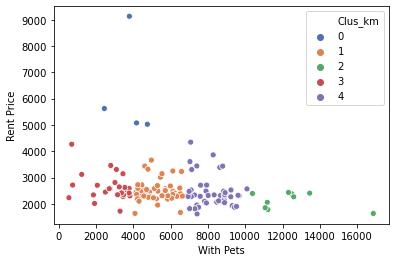

In [75]:
#2D visualization for rent price vs number of household with pets 
import seaborn as sns

g = sns.scatterplot(x="With Pets", y="Rent Price",
              hue="Clus_km", palette="deep",
              data=df3);
g

It's clear that cluster 2 zip codes are the best choices when it comes to setting up a new pet business. Let's explore further:

In [88]:
dw = df3[df3['Clus_km'] == 2]
dw

,Zip Code,Latitude,Longitude,Cities/Communities,With Pets,Rent Price,Pet Establishment,No Pet Establishment,Clus_km
18,90034,34.030560,-118.39804,Los Angeles (Palms),13454,2411,0,True,2
63,90011,34.007063,-118.25868,Los Angeles (Southeast Los Angeles),12491,2385,0,True,2
104,90250,33.914614,-118.35092,Hawthorne (Holly Park),16863,1637,0,True,2
125,90280,33.944264,-118.19490,South Gate,12320,2437,0,True,2
143,93550,34.565480,-118.08549,"Lake Los Angeles, Palmdale",11216,1788,0,True,2
150,93536,34.728857,-118.32683,"Del Sur, Fairmont, Lancaster, Metler Valley, N...",11182,2062,0,True,2
204,90640,34.014212,-118.11358,Montebello,10388,2398,0,True,2
221,90201,33.972814,-118.17385,"Bell, Bell Gardens, Cudahy",12598,2272,0,True,2
243,93535,34.691946,-117.97756,"Hi Vista, Lake Los Angeles, Lancaster, Rooseve...",11072,1855,0,True,2


So those are 9 zip codes in LA considered to be the best zip codes to open a new pet-related establishments because it has zero pet -related business already (according to Foursquare), low rent price, and high pet population. We have one clear winner here: zip code of 90250 or Hawthorne (Holly Park)

Before plotting the zip codes to the map, let's assign the zip codes with establishment one constant label = 5

In [78]:
df4 = df2[df2['No Pet Establishment'] == False]
df4['Clus_km'] = 5
df4

<ipython-input-78-5c9af2cd3701>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Clus_km'] = 5


,Zip Code,Latitude,Longitude,Cities/Communities,With Pets,Rent Price,Pet Establishment,No Pet Establishment,Clus_km
1,90293,33.957012,-118.44167,Los Angeles (Playa del Rey),3481,2776,2,False,5
4,90005,34.058911,-118.30848,"Los Angeles (Hancock Park, Koreatown, Wilshire...",8577,2024,2,False,5
6,91423,34.153628,-118.43222,"Los Angeles (Sherman Oaks, Van Nuys)",8090,2458,3,False,5
7,91602,34.152476,-118.36841,"Los Angeles (North Hollywood, Studio City, Tol...",5046,2482,3,False,5
8,90001,33.972914,-118.24878,"Los Angeles (South Los Angeles), Florence-Graham",7221,2317,2,False,5
...,...,...,...,...,...,...,...,...,...
254,90650,33.906914,-118.08339,Norwalk,14245,2380,2,False,5
255,91351,34.424794,-118.44513,Santa Clarita (Canyon Country),5192,2430,1,False,5
259,91016,34.140806,-118.00184,Monrovia,7531,2501,2,False,5
264,90247,33.891265,-118.29750,Gardena,8300,2411,2,False,5


In [80]:
#concantenate 2 dataframes
dftotal = [df3, df4]
our_df = pd.concat(dftotal)
our_df

,Zip Code,Latitude,Longitude,Cities/Communities,With Pets,Rent Price,Pet Establishment,No Pet Establishment,Clus_km
0,90265,34.051056,-118.80768,Malibu,3791,9131,0,True,0
2,91307,34.197737,-118.64797,"Los Angeles (West Hills), Bell Canyon",4616,3438,0,True,1
3,91733,34.050510,-118.04834,"El Monte, South El Monte",5858,2298,0,True,1
5,90003,33.962714,-118.27600,"Los Angeles (South Los Angeles, Southeast Los ...",8672,2318,0,True,4
9,91384,34.478797,-118.65255,"Castaic, Val Verde",3652,2528,0,True,3
...,...,...,...,...,...,...,...,...,...
254,90650,33.906914,-118.08339,Norwalk,14245,2380,2,False,5
255,91351,34.424794,-118.44513,Santa Clarita (Canyon Country),5192,2430,1,False,5
259,91016,34.140806,-118.00184,Monrovia,7531,2501,2,False,5
264,90247,33.891265,-118.29750,Gardena,8300,2411,2,False,5


In [82]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

kclusters = 6

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(our_df['Latitude'], our_df['Longitude'], our_df['Zip Code'], our_df['Clus_km']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Cluster 2 has blue color :) Okay, done

In [85]:
LA_pet_clean.groupby('Category').count()

,Zip Code,Zip Code Latitude,Zip Code Longitude,Venue,Venue ID,Venue Latitude,Venue Longitude
Category,,,,,,,
Pet Service,175,175,175,175,175,175,175
Pet Store,138,138,138,138,138,138,138


In [ ]:
LA_pet_clean.groupby('Category').count()

In [89]:
dw[["Zip Code","Latitude","Longitude","Cities/Communities","With Pets","Rent Price","No Pet Establishment","Clus_km"]]

,Zip Code,Latitude,Longitude,Cities/Communities,With Pets,Rent Price,No Pet Establishment,Clus_km
18,90034,34.030560,-118.39804,Los Angeles (Palms),13454,2411,True,2
63,90011,34.007063,-118.25868,Los Angeles (Southeast Los Angeles),12491,2385,True,2
104,90250,33.914614,-118.35092,Hawthorne (Holly Park),16863,1637,True,2
125,90280,33.944264,-118.19490,South Gate,12320,2437,True,2
143,93550,34.565480,-118.08549,"Lake Los Angeles, Palmdale",11216,1788,True,2
150,93536,34.728857,-118.32683,"Del Sur, Fairmont, Lancaster, Metler Valley, N...",11182,2062,True,2
204,90640,34.014212,-118.11358,Montebello,10388,2398,True,2
221,90201,33.972814,-118.17385,"Bell, Bell Gardens, Cudahy",12598,2272,True,2
243,93535,34.691946,-117.97756,"Hi Vista, Lake Los Angeles, Lancaster, Rooseve...",11072,1855,True,2


In [90]:
df1.describe()

,Latitude,Longitude,With Pets,Rent Price
count,267.000000,267.000000,267.000000,267.000000
mean,34.064966,-118.260787,6491.483146,2569.704120
std,0.181526,0.199947,2938.527272,727.835166
min,33.368642,-118.837040,552.000000,1566.000000
25%,33.956463,-118.394595,4456.000000,2244.000000
50%,34.061611,-118.282900,6223.000000,2408.000000
75%,34.154627,-118.134480,8228.000000,2709.500000
max,34.728857,-117.719730,16863.000000,9131.000000


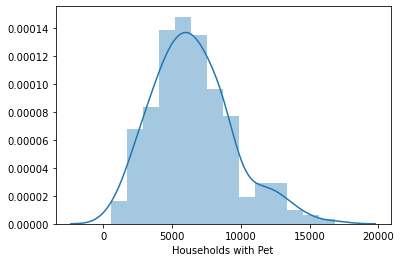

In [93]:
x = pd.Series(df1["With Pets"], name="Households with Pet")
ax = sns.distplot(x)